# Crime Data Analysis using Machine Learning Part 3

### This notebook covers balancing the datasets before implementing various classification ML models for predicting crime categories. Various train:test splits, evaluation, validation and hyperparameter tuning techniques are leveraged in optimising each model

#### <span style="color:Teal"> Importing Dependencies</span>

In [1]:
# Visualization Libraries
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

#Preprocessing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

#### <span style="color:Teal">Loading Data</span>

In [4]:
# #Commenting out sections of code to reduce computational cost

# Loading the PreProcessed file in Python and assign it to appropriate variables
# df = pd.read_csv("Crime_dataset_4_processing.csv")

## Factorised Option
#df_fact = pd.read_csv('df_fact.csv')
# X_fact_fs = pd.read_csv('X_fact_fs.csv')

# # Label Encoder Option
# df_le = pd.read_csv('df_le.csv')
df_le_scaled = pd.read_csv('df_le_scaled.csv')
# X_le_fs = pd.read_csv('X_le_fs.csv')
# X_le_fsCor_scaled = pd.read_csv('X_le_fsCor_scaled.csv')
# X_le_fsPCA_scaled = pd.read_csv('X_le_fsPCA_scaled.csv')


# # Dummies Option
# df_dum = pd.read_csv('df_dum.csv')
# df_dum_scaled = pd.read_csv('df_dum_scaled.csv')
# X_dum_fsCor = pd.read_csv('X_dum_fsCor.csv')
# X_dum_fsCor_scaled = pd.read_csv('X_dum_fsCor_scaled.csv') 
# X_dum_fsPCA_scaled = pd.read_csv('X_dum_fsPCA_scaled.csv') 

# Target variable y
y = pd.read_csv('target.csv') 


#### <span style="color:Teal">Confirming the dataframes in use</span>

In [6]:
print('The factorised datasets include:')
print('Full dataset: ', df_fact.shape)
# print('Feature selected: ', X_fact_fs.shape)

# print('\nThe Label Encoded datasets include:')
# print('Full dataset: ', df_le.shape)
# print('Full dataset scaled: ', df_le_scaled.shape)
# print('Feature selected not scaled: ', X_le_fs.shape)
# print('Feature selected by Correlation: ', X_le_fsCor_scaled.shape)
# print('Feature selected by PCA: ', X_le_fsPCA_scaled.shape)

# print('\nThe Dummies datasets include:')
# print('Full dataset: ', df_dum.shape)
# print('Full dataset scaled: ', df_dum_scaled.shape)
# print('Feature selected not scaled: ', X_dum_fsCor.shape)
# print('Feature selected by Correlation: ', X_dum_fsCor_scaled.shape)
# print('Feature selected by PCA: ', X_dum_fsPCA_scaled.shape)

print('\nThe target variable:')
print(y.shape)

The factorised datasets include:
Full dataset:  (331796, 16)

The target variable:
(331796, 1)


#### <span style="color:Teal">Changing target variable from dictionary to array</span>

In [5]:
y = y.values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [3],
       [0]], dtype=int64)

In [6]:
y.shape

(331796, 1)

In [7]:
y = np.reshape(y, (-1,))
y.shape

(331796,)

In [8]:
# Storing target labels for visuals
target_names = ['Assault', 'Break and Enter', 'Robbery', 'Auto Theft',
       'Theft Over']
target_names

['Assault', 'Break and Enter', 'Robbery', 'Auto Theft', 'Theft Over']

#### <span style="color:Teal">Dropping the target variable</span>

In [11]:
# Alot of code had to be commented out as it was to demanding on CPU and memory

df_fact_X = df_fact.drop(['MCI_CATEGORY'], axis = 1)

# df_le = df_le.drop('MCI_CATEGORY', axis = 1)
# df_le_scaled = df_le_scaled.drop('MCI_CATEGORY', axis = 1)

# df_dum = df_dum.drop('MCI_CATEGORY', axis = 1)
# df_dum_scaled = df_dum_scaled.drop('MCI_CATEGORY', axis = 1)

# print('The factorised datasets include:')
print('Full dataset: ', df_fact_X.shape)
# print('Feature selected: ', X_fact_fs.shape)

# print('\nThe Label Encoded datasets include:')
# print('Full dataset: ', df_le.shape)
# print('Full dataset scaled: ', df_le_scaled.shape)
# print('Feature selected not scaled: ', X_le_fs.shape)
# print('Feature selected by Correlation: ', X_le_fsCor_scaled.shape)
# print('Feature selected by PCA: ', X_le_fsPCA_scaled.shape)

# print('\nThe Dummies datasets include:')
# print('Full dataset: ', df_dum.shape)
# print('Full dataset scaled: ', df_dum_scaled.shape)
# print('Feature selected not scaled: ', X_dum_fsCor.shape)
# print('Feature selected by Correlation: ', X_dum_fsCor_scaled.shape)
# print('Feature selected by PCA: ', X_dum_fsPCA_scaled.shape)

print('\nThe target variable:')
print(y.shape)

Full dataset:  (331796, 15)

The target variable:
(331796,)


# <span style="color:LightCoral">First Model Implementation using </span><span style="color:SeaGreen">Random Forest..</span><span style="color:LightCoral">...for classification and feature selection</span><span style="color:SeaGreen">...on  Factorised Dataset with no Scaling or Feature Extraction previously applied.</span>

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

### <span style="color:">Splitting and Balancing the Datasets using SMOTE</span>

Previous excersises have shown that Over-Sampling produces more accurate results. 
This is done by generating synthetic samples from instances in the minority class randomly. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique.

Under-sampling using the Near-Miss Algorithm will also be tested if time permits.

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.1,  random_state = 42, stratify = y) # 70% training and 30% test

smt = SMOTE(random_state = 42) # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

Current shape of training set:  (298616, 15)
Current shape of training target labels:  (298616,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [10]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (786040, 15)
New shape of training label set following SMOTE:  (786040,)

New value counts by class:
 0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [11]:
df_fact_X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 15), (331796,), (786040, 15), (33180, 15), (786040,), (33180,))

#### <span style="color:Teal">Modelling</span>

In [12]:
#Instantiating a class of Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

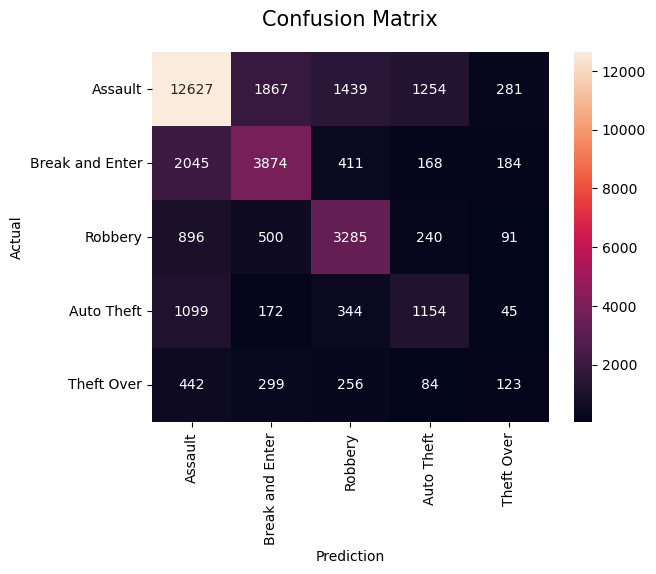

In [15]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

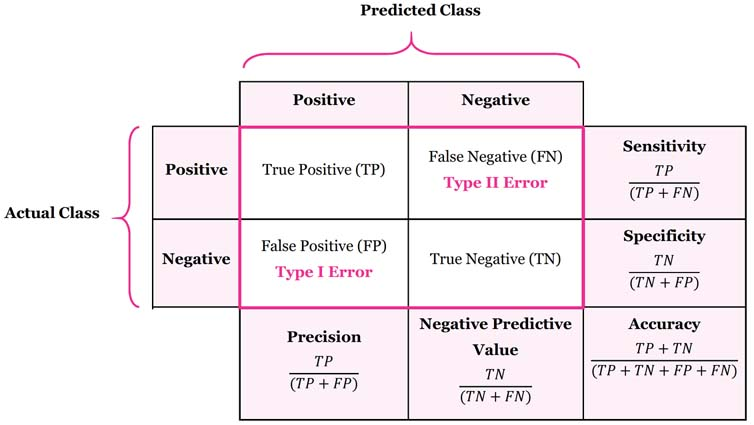

In [16]:
from IPython.display import Image
Image(filename='Confusion Matrix A.png') 

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the diabetes data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


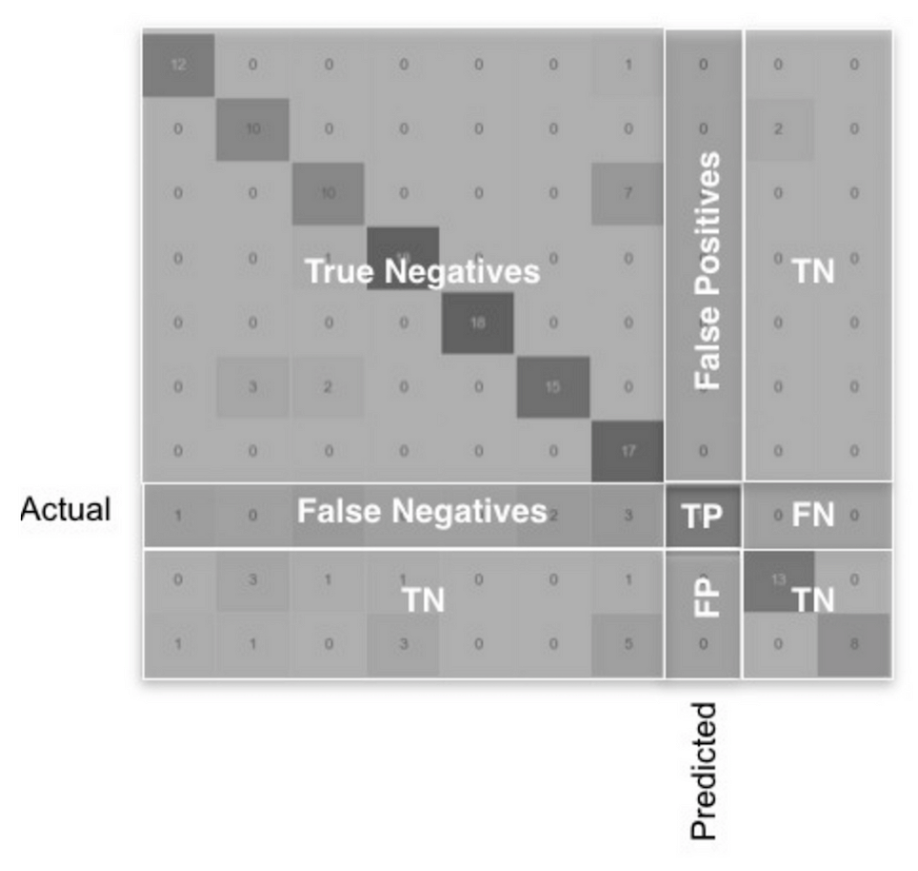

In [18]:
from IPython.display import Image
Image(filename='Confusion Matrix B.png') 

In [19]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:20,:]

array([[0, 2],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [3, 3],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [0, 0],
       [0, 3],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 4]], dtype=int64)

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [20]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.9948272352552033
Testing Accuaracy : 0.6348101265822785


<span style="color:LightCoral"> Initial observations are that the model is clearly overfitting with a poor test accuracy relative to the training scores. </span>

#### <span style="color:Teal"> Classification Report</span>
Classification report helps us in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class. We use the sklearn library to visualize the classification report. 

With this, we can predict how accurately the model or classifier can predict the type of crime. So we will calculate the accuracy score, recall, and precision for our evaluation.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

In [23]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     17468
           1       0.58      0.58      0.58      6682
           2       0.57      0.66      0.61      5012
           3       0.40      0.41      0.40      2814
           4       0.17      0.10      0.13      1204

    accuracy                           0.63     33180
   macro avg       0.49      0.49      0.49     33180
weighted avg       0.63      0.63      0.63     33180



#### <span style="color:Teal">  macro avg </span>
A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

#### <span style="color:Teal">  weighted avg </span>
The weighted arithmetic mean is comparable to an ordinary arithmetic mean, with the exception that some data points contribute more to the final average than others, as opposed to all data points contributing equally.

#### <span style="color:Teal">Cross Validating Model</span>

Cross validation allows for validating the model results across multiple folds of data thus producing a more accurate average score

In [24]:
cross_val_score(clf_RF, df_fact_X, y, scoring='accuracy', cv=15).mean() # calculating the average accuracy following 30 fold cross-validation

0.5369833049469578

In [25]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, df_fact_X, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.49152065964148184
Mean precision_macro: 0.37990808166586637
Mean recall_macro: 0.3165077434557082
Mean f1_macro: 0.3055047637416152


In [26]:
df_fact_X.head()

,DIVISION,LOCATION_TYPE,PREMISES_TYPE,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,OCCURRENCE_YEAR,OCCURRENCE_MONTH,OCCURRENCE_DAY,OCCURRENCE_DOY,OCCURRENCE_DOW,OCCURRENCE_HOUR,TIME_OF_DAY,DAY_OR_NIGHT,CPD_NEIGHBOURHOOD
0,0,0,0,0,-79.384206,43.670798,2014,0,1,1,0,0,0,0,1
1,0,1,1,1,-79.345795,43.703684,2014,0,1,1,0,0,0,0,3
2,1,2,2,2,-79.379131,43.645981,2014,0,1,1,0,10,1,1,1
3,1,2,2,3,-79.383200,43.654313,2014,0,1,1,0,0,0,0,6
4,2,3,1,4,-79.513797,43.719824,2014,0,1,1,0,8,1,1,1


#### <span style="color:Teal">Predicting the category of crime</span>

In [27]:
clf_RF.predict([[0,0,0,0,-79.345656, 43.751515, 2023, 0, 1, 1, 0, 14, 1, 1, 3 ]])

array([0], dtype=int64)

#### <span style="color:Teal">Random Forest for Feature Selection</span>

<span style="color:LightCoral"> Hopefully this will reaffirm the results following feature extraction and selection using Pearsosn Correlation and PCA. </span>

              Feature  Importance
1       LOCATION_TYPE    0.112857
4          LONG_WGS84    0.102078
5           LAT_WGS84    0.099662
9      OCCURRENCE_DOY    0.095997
2       PREMISES_TYPE    0.083239
3   NEIGHBOURHOOD_158    0.080176
8      OCCURRENCE_DAY    0.079924
11    OCCURRENCE_HOUR    0.064268
6     OCCURRENCE_YEAR    0.061334
7    OCCURRENCE_MONTH    0.055590
10     OCCURRENCE_DOW    0.051925
0            DIVISION    0.051201
14  CPD_NEIGHBOURHOOD    0.030323
12        TIME_OF_DAY    0.019928
13       DAY_OR_NIGHT    0.011499


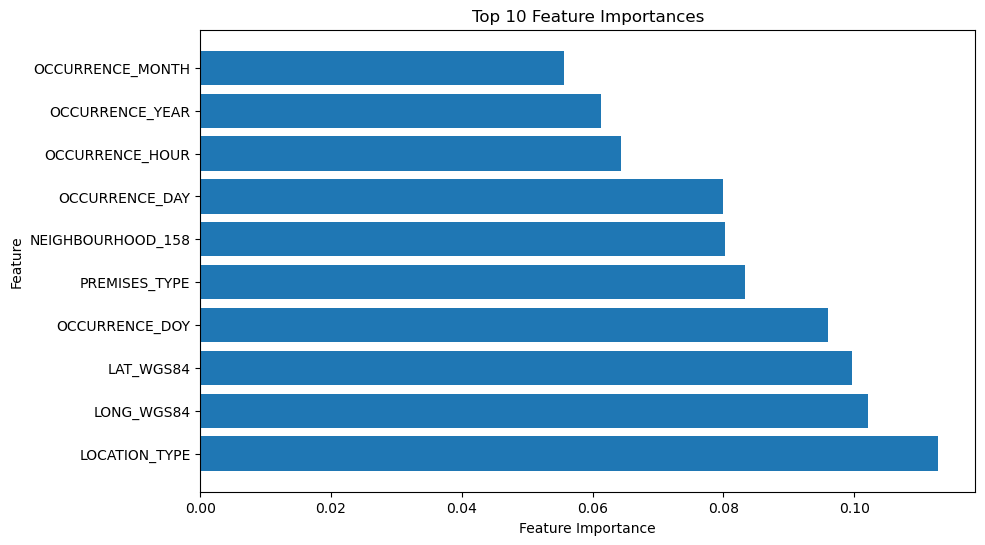

In [28]:
# Get feature importances from the trained model
feature_importances = clf_RF.feature_importances_

# Get the names of your features
feature_names = df_fact_X.columns

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualizing the feature importances dataframe
print(feature_importance_df)

# Plotting the the most important features
top_n = 10  # Selecting the top ten features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.show()

#### <span style="color:Teal">Comparing Random Forest Feature Selection reccomendations with previous results from Pearson's Correlation and PCA</span>

In [29]:
print("Factorised Dataset features based on Pearson Correlation:")
print("X_fact_fs  = df_fact[['LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158', 'DAY_OR_NIGHT']]")


print("\nLabel Encoded Dataset features based on Pearson Correlation:")
print("X_le_fs  = df_le[['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158', 'OCCURRENCE_HOUR','DAY_OR_NIGHT' ]]")

print("\nLabel Encoded Scaled Dataset features based on Pearson Correlation")
print("X_le_fsCor_scaled  = df_le_scaled[['LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158']]")

print("\nLabel Encoded Scaled Dataset features based on PCA")
print("X_le_fsPCA_scaled  = df_le_scaled[['PREMISES_TYPE', 'LOCATION_TYPE', 'LAT_WGS84', 'DIVISION', 'HOOD_158', 'OCCURRENCE_HOUR', 'TIME_OF_DAY', 'LONG_WGS84', 'OCCURRENCE_DOY', 'OCCURRENCE_MONTH']]")
       
print("\nThe Datasets produced following label encoding using the Dummies techniques will not be compared with th above feature selection results as it consists of different features.")

Factorised Dataset features based on Pearson Correlation:
X_fact_fs  = df_fact[['LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158', 'DAY_OR_NIGHT']]

Label Encoded Dataset features based on Pearson Correlation:
X_le_fs  = df_le[['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158', 'OCCURRENCE_HOUR','DAY_OR_NIGHT' ]]

Label Encoded Scaled Dataset features based on Pearson Correlation
X_le_fsCor_scaled  = df_le_scaled[['LOCATION_TYPE', 'PREMISES_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'HOOD_158']]

Label Encoded Scaled Dataset features based on PCA
X_le_fsPCA_scaled  = df_le_scaled[['PREMISES_TYPE', 'LOCATION_TYPE', 'LAT_WGS84', 'DIVISION', 'HOOD_158', 'OCCURRENCE_HOUR', 'TIME_OF_DAY', 'LONG_WGS84', 'OCCURRENCE_DOY', 'OCCURRENCE_MONTH']]

The Datasets produced following label encoding using the Dummies techniques will not be compared with th above feature selection results as it consists of different features.


<span style="color:LightCoral"> While the majority of features appears to be the same as the results from correlation and PCA, OCCURRENCE_DOY is much higher rated in Random Forest than DAY_OR_NIGHT from the other methods. OCCURRENCE_DAY and OCCURRENCE_YEAR also seem to be missing from all previous extraction method results, OCCURRENCE_MONTH too, to a lesser extent. A new dataset will be created and tested based on these Random Forrest Feature Importance Results. </span>

#### <span style="color:Teal">Feature Selection</span>

In [32]:
# Selecting the top 10 most important features based on Random Forest Feature Importance
X_fact_RF_fs = df_fact_X[['LOCATION_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'OCCURRENCE_DOY', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158', 'OCCURRENCE_DAY', 'OCCURRENCE_HOUR', 'OCCURRENCE_YEAR', 'OCCURRENCE_MONTH']].copy()

In [33]:
X_fact_RF_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331796 entries, 0 to 331795
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LOCATION_TYPE      331796 non-null  int64  
 1   LONG_WGS84         331796 non-null  float64
 2   LAT_WGS84          331796 non-null  float64
 3   OCCURRENCE_DOY     331796 non-null  int64  
 4   PREMISES_TYPE      331796 non-null  int64  
 5   NEIGHBOURHOOD_158  331796 non-null  int64  
 6   OCCURRENCE_DAY     331796 non-null  int64  
 7   OCCURRENCE_HOUR    331796 non-null  int64  
 8   OCCURRENCE_YEAR    331796 non-null  int64  
 9   OCCURRENCE_MONTH   331796 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 25.3 MB


### Hyperparameter Tuning

#### <span style="color:Teal">Train_Test_Split</span>

The Hyperparameters for train_test_split include, test_size, train_size, random_state, shuffle, stratify. 

test_size and train_size as the names suggest are the size or percentage of the data that should be allocated to each. Common training to testing splits include 70:30, 80:20 and 90:10. Adjusting this hyperparameter will produce different results and can be useful for different dataset sizes and models.
            
random_ state is a hyperparemter that assures reproducibility of the train_test_split and results across different implementations and on different machines.             

shuffle allows for the randomising and shuffling of the data before splitting. It is set to True(yes) by default

stratify is an option that allows for rataining the same proportion of label classes in the training and testing sets as to your fullset. Thereby creating a balanced train-test split of label classes.

#### <span style="color:Teal">Random Forest</span>

Hyperparamters for the Random Forest model,include n_estimators, max_depth, min_sample_split, min_samples_leaf, max_features, max_samples, bootstrap, and random_state. For now we will concentrate on n_estimators, max_depth and rondom_state.

n_estimators is a hyperparamter that that sets the number of decision trees to produce in the random forest model. Increasing this can improve the models performance but also increase the computational cost.

max_depth is a hyperparamter that determines the maximum depth or splits for each tree in the random forest model. This may be beneficial for large models and overfitting but does limit the model and may produce inconclusive or nonoptimal results.

random_state, like with the for train_test_split assures the saem results accros different reproductions.

#### <span style="color:Teal">Grid Search Cross Validation</span>

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=5, max_features=1, n_estimators=50;, score=0.419 total time=  18.2s
[CV 2/5] END max_depth=5, max_features=1, n_estimators=50;, score=0.431 total time=  18.7s
[CV 3/5] END max_depth=5, max_features=1, n_estimators=50;, score=0.456 total time=  18.9s
[CV 4/5] END max_depth=5, max_features=1, n_estimators=50;, score=0.458 total time=  18.8s
[CV 5/5] END max_depth=5, max_features=1, n_estimators=50;, score=0.457 total time=  19.4s
[CV 1/5] END max_depth=5, max_features=1, n_estimators=80;, score=0.403 total time=  31.6s
[CV 2/5] END max_depth=5, max_features=1, n_estimators=80;, score=0.428 total time=  29.0s
[CV 3/5] END max_depth=5, max_features=1, n_estimators=80;, score=0.461 total time=  28.8s
[CV 4/5] END max_depth=5, max_features=1, n_estimators=80;, score=0.456 total time=  30.1s
[CV 5/5] END max_depth=5, max_features=1, n_estimators=80;, score=0.467 total time=  29.0s
[CV 1/5] END max_depth=5, ma

[CV 5/5] END max_depth=10, max_features=2, n_estimators=100;, score=0.552 total time= 1.5min
[CV 1/5] END max_depth=10, max_features=3, n_estimators=50;, score=0.503 total time=67.9min
[CV 2/5] END max_depth=10, max_features=3, n_estimators=50;, score=0.540 total time=  56.2s
[CV 3/5] END max_depth=10, max_features=3, n_estimators=50;, score=0.566 total time=  56.0s
[CV 4/5] END max_depth=10, max_features=3, n_estimators=50;, score=0.568 total time=  55.9s
[CV 5/5] END max_depth=10, max_features=3, n_estimators=50;, score=0.563 total time=  55.5s
[CV 1/5] END max_depth=10, max_features=3, n_estimators=80;, score=0.502 total time= 2.2min
[CV 2/5] END max_depth=10, max_features=3, n_estimators=80;, score=0.539 total time= 1.5min
[CV 3/5] END max_depth=10, max_features=3, n_estimators=80;, score=0.564 total time= 1.5min
[CV 4/5] END max_depth=10, max_features=3, n_estimators=80;, score=0.567 total time= 1.5min
[CV 5/5] END max_depth=10, max_features=3, n_estimators=80;, score=0.569 total 

[CV 3/5] END max_depth=15, max_features=sqrt, n_estimators=100;, score=0.643 total time= 2.7min
[CV 4/5] END max_depth=15, max_features=sqrt, n_estimators=100;, score=0.646 total time= 2.6min
[CV 5/5] END max_depth=15, max_features=sqrt, n_estimators=100;, score=0.646 total time= 2.7min
[CV 1/5] END max_depth=20, max_features=1, n_estimators=50;, score=0.630 total time=  54.1s
[CV 2/5] END max_depth=20, max_features=1, n_estimators=50;, score=0.706 total time=  56.8s
[CV 3/5] END max_depth=20, max_features=1, n_estimators=50;, score=0.736 total time=  56.3s
[CV 4/5] END max_depth=20, max_features=1, n_estimators=50;, score=0.740 total time=  56.6s
[CV 5/5] END max_depth=20, max_features=1, n_estimators=50;, score=0.738 total time=  55.8s
[CV 1/5] END max_depth=20, max_features=1, n_estimators=80;, score=0.633 total time= 1.5min
[CV 2/5] END max_depth=20, max_features=1, n_estimators=80;, score=0.709 total time= 1.5min
[CV 3/5] END max_depth=20, max_features=1, n_estimators=80;, score=0

[CV 2/5] END max_depth=30, max_features=2, n_estimators=100;, score=0.787 total time= 3.3min
[CV 3/5] END max_depth=30, max_features=2, n_estimators=100;, score=0.821 total time= 3.2min
[CV 4/5] END max_depth=30, max_features=2, n_estimators=100;, score=0.824 total time= 3.2min
[CV 5/5] END max_depth=30, max_features=2, n_estimators=100;, score=0.824 total time=16.1min
[CV 1/5] END max_depth=30, max_features=3, n_estimators=50;, score=0.693 total time= 2.0min
[CV 2/5] END max_depth=30, max_features=3, n_estimators=50;, score=0.781 total time= 2.1min
[CV 3/5] END max_depth=30, max_features=3, n_estimators=50;, score=0.812 total time= 2.1min
[CV 4/5] END max_depth=30, max_features=3, n_estimators=50;, score=0.814 total time= 2.1min
[CV 5/5] END max_depth=30, max_features=3, n_estimators=50;, score=0.812 total time= 2.1min
[CV 1/5] END max_depth=30, max_features=3, n_estimators=80;, score=0.697 total time= 3.3min
[CV 2/5] END max_depth=30, max_features=3, n_estimators=80;, score=0.785 tot

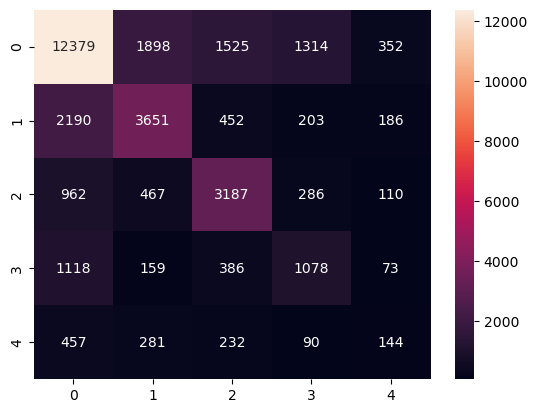

In [35]:
# finding the best hyper parameters for random forest
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameter values to search
param_grid = {'n_estimators':[50,80,100],'max_depth':[5,10,15,20,30], 'max_features': [1,2,3,'sqrt']}
# Create a GridSearchCV object with the SVM model, the parameter grid, and verbosity level for details level
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose = 4)
# Fit the GridSearchCV object to the training data to find the best hyperparameters
grid.fit(X_train,y_train)
# Retrieve the best hyperparameters found by the grid search
grid.best_params_
# Retrieve the best model based on the best hyperparameters
grid.best_estimator_
# Use the best model to make predictions on the test set
grid_predictions = grid.predict(X_test)
# Retrieve the best score
grid.best_score_
# Print the best scores
print("Best score: {:.2f}".format(grid.best_score_))
#Print the best parameters
print("Best parameters: {}".format(grid.best_params_))
# Compute the confusion matrix
cmG = confusion_matrix(y_test,grid_predictions)
# Plot the confusion matrix as a heatmap
sns.heatmap(cmG, fmt='d', annot=True)
# Print the classification report, including precision, recall, and F1-score
print(classification_report(y_test,grid_predictions))

<span style="color:LightCoral"> As the model is currently overfitting, a different train_test_split, n_estimators, max_features and max_depth limit will be implemented based on the GridSearchCV results. </span>

### <span style="color:Teal">Second Split: 80% Training and 20% for Testing</span>

### Splitting, OverSampling and Training

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.2,  random_state = 42, stratify = y) # 80% training and 20% test

smt = SMOTE(random_state = 42) # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

Current shape of training set:  (265436, 15)
Current shape of training target labels:  (265436,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [37]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (698700, 15)
New shape of training label set following SMOTE:  (698700,)

New value counts by class:
 0    139740
1    139740
2    139740
3    139740
4    139740
dtype: int64


<span style="color:LightCoral"> I notice that the new size of the training and testing datasets following applying SMOTE is different to the first iteration. I have applied a random_state to the SMOTE object but I believe that the reason for this variation in datasets shapes is due to the train_test_split that is being applied. In the first iteration, SMOTE was applied to a larger 90% of the training data and hence has produced more synthetic samples. </span>

In [38]:
# Confirming shapes of dfs
df_fact_X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 15), (331796,), (698700, 15), (66360, 15), (698700,), (66360,))

#### <span style="color:Teal">Initialising Model</span>

In [39]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 30, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

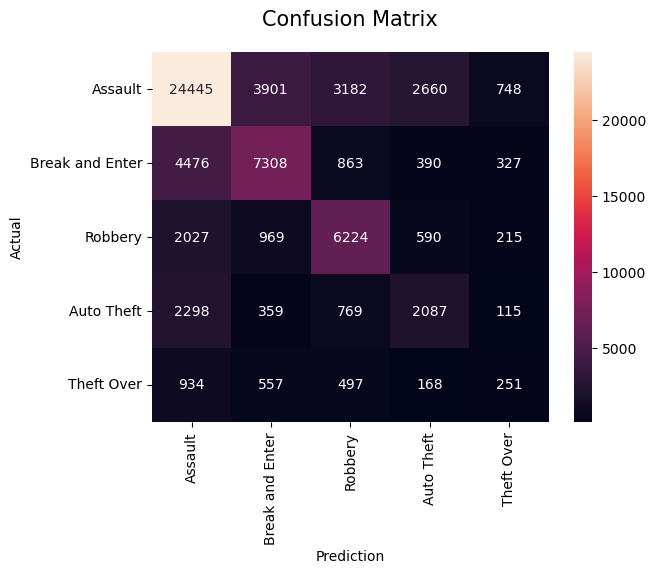

In [40]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [41]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.9953341920709889
Testing Accuaracy : 0.6075195901145268


The models still appears to be overfitting.

#### <span style="color:Teal">Classification Report </span>

In [42]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     34936
           1       0.56      0.55      0.55     13364
           2       0.54      0.62      0.58     10025
           3       0.35      0.37      0.36      5628
           4       0.15      0.10      0.12      2407

    accuracy                           0.61     66360
   macro avg       0.46      0.47      0.46     66360
weighted avg       0.61      0.61      0.61     66360



#### <span style="color:Teal">Cross Validation </span>

In [72]:
#cross_val_score(clf_RF, df_fact_X, y, scoring='accuracy', cv=15).mean() # calculating the average accuracy following 30 fold cross-validation

0.5409857660442157

In [43]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, df_fact_X, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.5147822736630454
Mean precision_macro: 0.35324679901421074
Mean recall_macro: 0.2944024924607716
Mean f1_macro: 0.2798442967348654


### <span style="color:Teal">Third Split: 70% Training and 30% for Testing</span>

### Splitting, OverSampling and Training

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

In [45]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (611365, 15)
New shape of training label set following SMOTE:  (611365,)

New value counts by class:
 0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


In [46]:
df_fact_X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 15), (331796,), (611365, 15), (99539, 15), (611365,), (99539,))

#### <span style="color:Teal">Initialising Model</span>

In [59]:
# Instantiating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 150,  max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

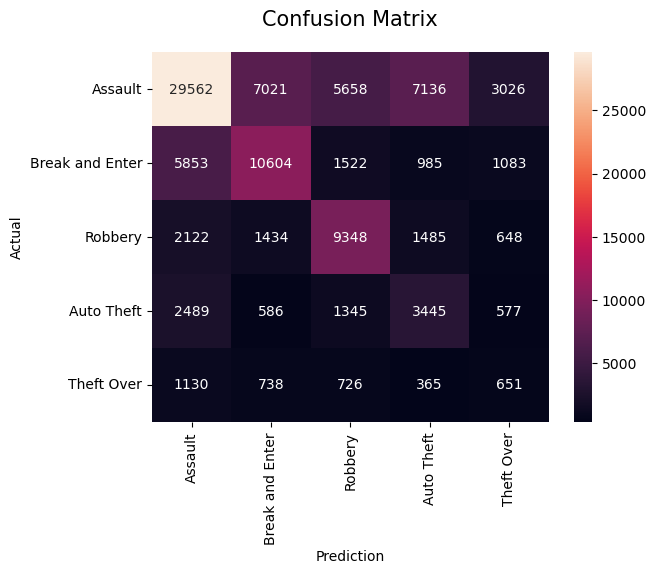

In [60]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [61]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.6682080263018001
Testing Accuaracy : 0.5385828670169481


Based on the testing and training accuracy results, the model now appears to be underfitting.

#### <span style="color:Teal">Model Performance Learning Curve  </span>

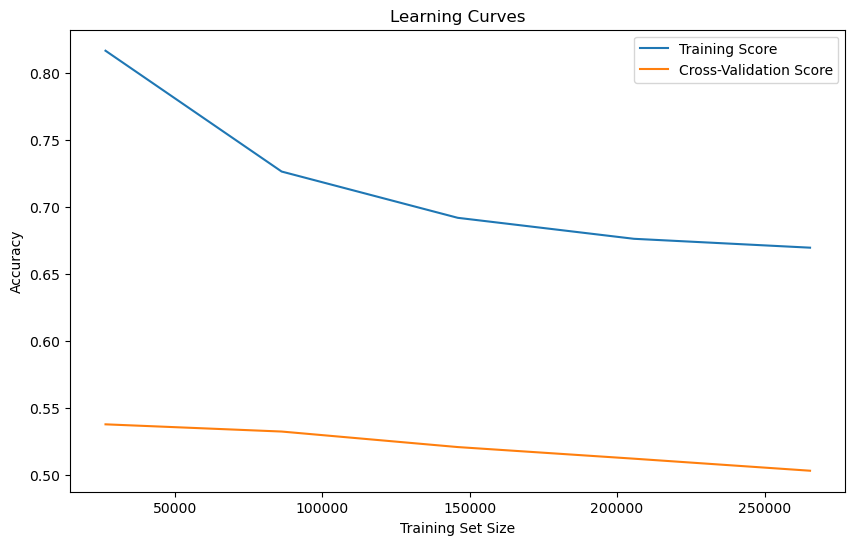

In [62]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_RF, df_fact_X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

#### <span style="color:Teal">Model Optimisation Learning Curve  </span>

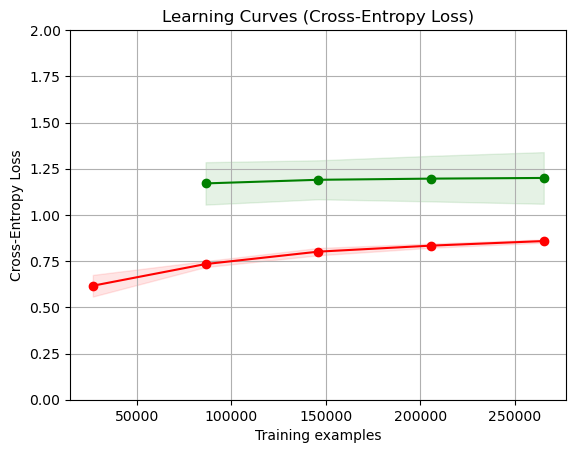

In [64]:
from sklearn.metrics import log_loss

def plot_learning_curve_loss(estimator, title, X, y, ylim=None, cv=None,
                             n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve plot showing cross-entropy loss.

    Parameters:
    - estimator: the learning algorithm
    - title: the title of the plot
    - X: input features
    - y: target variable
    - ylim: tuple, optional, set to specify y-axis limits
    - cv: int, cross-validation generator or an iterable, optional
    - n_jobs: int or None, optional
    - train_sizes: array-like, optional, default is np.linspace(.1, 1.0, 5)
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Cross-Entropy Loss")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Loss")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-Validation Loss")

plot_learning_curve_loss(clf_RF, "Learning Curves (Cross-Entropy Loss)", df_fact_X, y, ylim=(0, 2), cv=5)
plt.show()

Training loss is displayed in green and validation loss in red. Training loss appears to be slightly increasing if not level while the validation loss is increasing with training. This indicates overfitting. (Brownlee, 2019) Reducing the size of the dataset may aid in generising the model.

#### <span style="color:Teal">Classification Report </span>

In [65]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63     52403
           1       0.52      0.53      0.52     20047
           2       0.50      0.62      0.56     15037
           3       0.26      0.41      0.32      8442
           4       0.11      0.18      0.14      3610

    accuracy                           0.54     99539
   macro avg       0.42      0.46      0.43     99539
weighted avg       0.58      0.54      0.55     99539



#### <span style="color:Teal">Cross Validation </span>

In [66]:
#cross_val_score(clf_RF, df_fact_X, y, scoring='accuracy', cv=15).mean() # calculating the average accuracy following 30 fold cross-validation

In [67]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, df_fact_X, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.5340050577937151
Mean precision_macro: 0.37683900909081813
Mean recall_macro: 0.2761645678573096
Mean f1_macro: 0.2576152898187056


# <span style="color:LightCoral">Second Model Implementation using </span><span style="color:SeaGreen">Random Forest..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...on unScaled Dataset and following Feature Selection (Random Forest)</span>

### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

### Splitting, OverSampling and Training


In [68]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_fact_RF_fs, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

Current shape of training set:  (232257, 10)
Current shape of training target labels:  (232257,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [69]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (611365, 10)
New shape of training label set following SMOTE:  (611365,)

New value counts by class:
 0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


In [87]:
X_fact_RF_fs.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 10), (331796,), (42120, 10), (99539, 10), (42120,), (99539,))

#### <span style="color:Teal">Initialising Model</span>

In [77]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 80, max_depth = 30, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

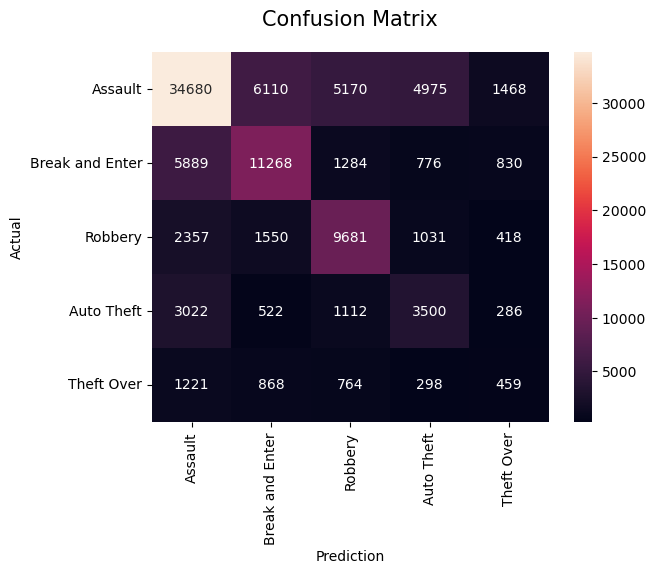

In [78]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [79]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.9957406786453264
Testing Accuaracy : 0.5986397291513879


#### <span style="color:Teal">Classification Report </span>

In [80]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70     52403
           1       0.55      0.56      0.56     20047
           2       0.54      0.64      0.59     15037
           3       0.33      0.41      0.37      8442
           4       0.13      0.13      0.13      3610

    accuracy                           0.60     99539
   macro avg       0.46      0.48      0.47     99539
weighted avg       0.61      0.60      0.60     99539



#### <span style="color:Teal">Cross Validation </span>

In [81]:
#cross_val_score(clf_RF, df_fact_X, y, scoring='accuracy', cv=15).mean() # calculating the average accuracy following 30 fold cross-validation

In [82]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, X_fact_RF_fs, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.5136158974823778
Mean precision_macro: 0.35350878256213475
Mean recall_macro: 0.29434141620336446
Mean f1_macro: 0.279684470940727


## Trying Undersampling with NearMiss as this will reduce the size of the data being trained and tested and hopefully nullify overfitting

### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

### Splitting, UnderSampling and Training

In [84]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_fact_RF_fs, y, test_size = 0.3,  random_state = 42, stratify = y) 
# Create an object by calling a methof NearMiss()
nr = NearMiss()
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train) #Applying NearMiss technique

Current shape of training set:  (232257, 10)
Current shape of training target labels:  (232257,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [85]:
print("New shape of training set following NearMiss: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following NearMiss: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following NearMiss:  (42120, 10)
New shape of training label set following NearMiss:  (42120,)

New value counts by class:
 0    8424
1    8424
2    8424
3    8424
4    8424
dtype: int64


In [88]:
X_fact_RF_fs.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 10), (331796,), (42120, 10), (99539, 10), (42120,), (99539,))

#### <span style="color:Teal">Initialising Model</span>

In [96]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 80, max_depth = 30, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

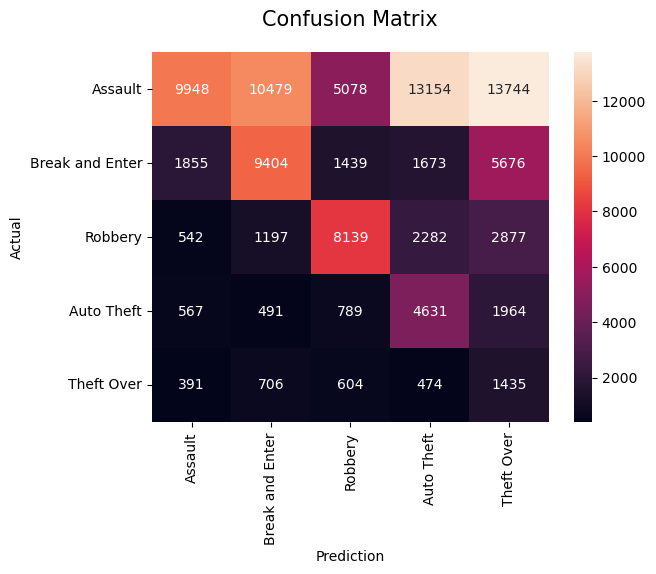

In [97]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [98]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.9875356125356125
Testing Accuaracy : 0.3371241422959845


#### <span style="color:Teal">Classification Report </span>

In [99]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.19      0.30     52403
           1       0.42      0.47      0.44     20047
           2       0.51      0.54      0.52     15037
           3       0.21      0.55      0.30      8442
           4       0.06      0.40      0.10      3610

    accuracy                           0.34     99539
   macro avg       0.39      0.43      0.33     99539
weighted avg       0.58      0.34      0.36     99539



## Another attempt at Optimising Random Forest by reducing the training and testing samples by almost 90%

### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

### Splitting, OverSampling and Training


In [104]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_fact_RF_fs, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function

# Further reduce the size of training and testing sets
reduced_train_size = 0.15  
reduced_test_size = 0.15   

X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, train_size=reduced_train_size, random_state=42, stratify=y_train)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test, y_test, train_size=reduced_test_size, random_state=42, stratify=y_test)

print("Current shape of training set: ", X_train_reduced.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train_reduced.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train_reduced, y_train_reduced = smt.fit_resample(X_train_reduced, y_train_reduced) #Applying SMOTE technique

Current shape of training set:  (34838, 10)
Current shape of training target labels:  (34838,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [105]:
print("New shape of training set following SMOTE: ", X_train_reduced.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train_reduced.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train_reduced)).value_counts())

New shape of training set following SMOTE:  (91705, 10)
New shape of training label set following SMOTE:  (91705,)

New value counts by class:
 0    18341
1    18341
2    18341
3    18341
4    18341
dtype: int64


In [106]:
X_fact_RF_fs.shape, y.shape, X_train_reduced.shape, X_test_reduced.shape, y_train_reduced.shape, y_test_reduced.shape

((331796, 10), (331796,), (91705, 10), (14930, 10), (91705,), (14930,))

#### <span style="color:Teal">Initialising Model</span>

In [110]:
#Creating a Random Forest Classifier
# Max-depth lower in attempts to reduce overfitting
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = clf_RF.predict(X_test_reduced)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

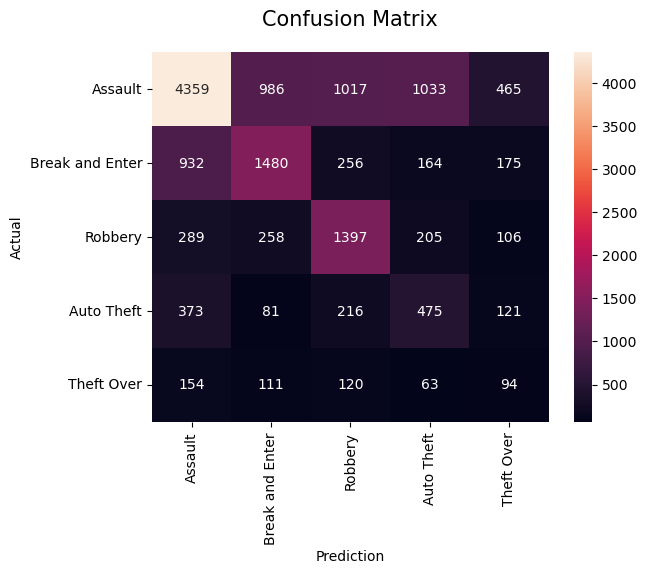

In [111]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test_reduced, y_pred_reduced)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [112]:
print("Training Accuracy :", clf_RF.score(X_train_reduced, y_train_reduced))
print("Testing Accuaracy :", clf_RF.score(X_test_reduced, y_test_reduced))

Training Accuracy : 0.8334878141867946
Testing Accuaracy : 0.5227729403884795


#### <span style="color:Teal">Classification Report </span>

In [114]:
# Display the classification report
print(classification_report(y_test_reduced, y_pred_reduced))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62      7860
           1       0.51      0.49      0.50      3007
           2       0.46      0.62      0.53      2255
           3       0.24      0.38      0.30      1266
           4       0.10      0.17      0.13       542

    accuracy                           0.52     14930
   macro avg       0.41      0.44      0.42     14930
weighted avg       0.57      0.52      0.54     14930



#### <span style="color:Teal">Cross Validation </span>

In [115]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, X_fact_RF_fs, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.49856442144488844
Mean precision_macro: 0.39904627699155276
Mean recall_macro: 0.26412077324102307
Mean f1_macro: 0.24310720256125173


# <span style="color:LightCoral">Third Model Implementation using </span><span style="color:SeaGreen">Random Forest..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...on Scaled Dataset with LabelEncoding and following Feature Selection (Random Forest)</span>

### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

### Splitting, OverSampling and Training

In [280]:
# Loading the scaled label encoded dataset
df_le_scaled = pd.read_csv('df_le_scaled.csv')

In [296]:
df_le_scaled.columns

Index(['OCC_DATE', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'OCCURRENCE_YEAR', 'OCCURRENCE_MONTH',
       'OCCURRENCE_DAY', 'OCCURRENCE_DOY', 'OCCURRENCE_DOW', 'OCCURRENCE_HOUR',
       'TIME_OF_DAY', 'CPD_NEIGHBOURHOOD', 'DAY_OR_NIGHT'],
      dtype='object')

In [281]:
# Selecting the top 7 features based on RF importance
df_le_scaled_RF_X = df_le_scaled[['LOCATION_TYPE', 'LONG_WGS84', 'LAT_WGS84', 'OCCURRENCE_DOY', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158', 'OCCURRENCE_DAY']].copy()

In [282]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_le_scaled_RF_X, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

Current shape of training set:  (232257, 7)
Current shape of training target labels:  (232257,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [283]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (611365, 7)
New shape of training label set following SMOTE:  (611365,)

New value counts by class:
 0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


In [284]:
df_le_scaled_RF_X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331796, 7), (331796,), (611365, 7), (99539, 7), (611365,), (99539,))

### Instantiating Model

In [291]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

### Evaluating the Results

#### <span style="color:Teal">Confusion Matrix</span>

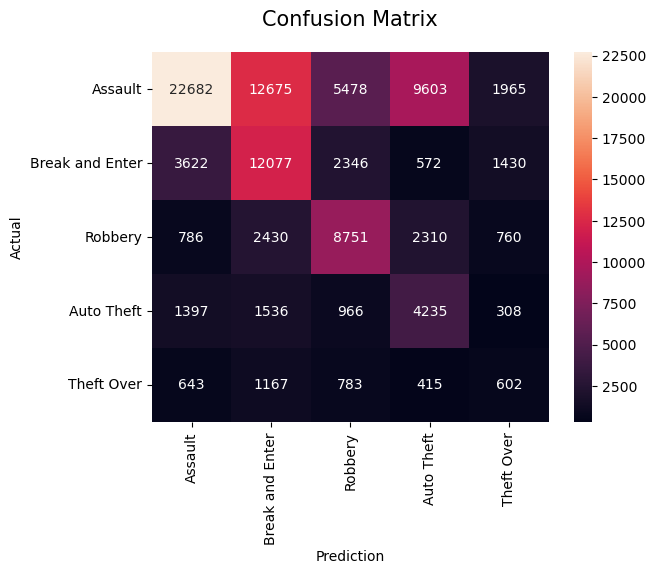

In [292]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

#### <span style="color:Teal">Model evaluation scores </span>

In [293]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.5961152503005569
Testing Accuaracy : 0.48570911903876873


#### <span style="color:Teal">Classification Report </span>

In [294]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.43      0.56     52403
           1       0.40      0.60      0.48     20047
           2       0.48      0.58      0.52     15037
           3       0.25      0.50      0.33      8442
           4       0.12      0.17      0.14      3610

    accuracy                           0.49     99539
   macro avg       0.41      0.46      0.41     99539
weighted avg       0.59      0.49      0.50     99539



#### <span style="color:Teal">Cross Validation </span>

In [295]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, df_le_scaled_RF_X, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.592388041623676
Mean precision_macro: 0.5170919238174836
Mean recall_macro: 0.3238591533689594
Mean f1_macro: 0.32310869488634875


### Feature Importance using RF on scaled and label encoded dataset

In [304]:
df_le_scaled.columns

Index(['OCC_DATE', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'OCCURRENCE_YEAR', 'OCCURRENCE_MONTH',
       'OCCURRENCE_DAY', 'OCCURRENCE_DOY', 'OCCURRENCE_DOW', 'OCCURRENCE_HOUR',
       'TIME_OF_DAY', 'CPD_NEIGHBOURHOOD', 'DAY_OR_NIGHT'],
      dtype='object')

In [309]:
features = df_le_scaled.drop(['MCI_CATEGORY', 'UCR_CODE', 'OFFENCE', 'HOOD_158', 'OCC_DATE'], axis = 1)

In [310]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE techni

Current shape of training set:  (232257, 15)
Current shape of training target labels:  (232257,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [311]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

              Feature  Importance
2       PREMISES_TYPE    0.204863
1       LOCATION_TYPE    0.196070
11    OCCURRENCE_HOUR    0.067738
6     OCCURRENCE_YEAR    0.066746
4          LONG_WGS84    0.061379
0            DIVISION    0.059585
5           LAT_WGS84    0.055304
13  CPD_NEIGHBOURHOOD    0.045091
3   NEIGHBOURHOOD_158    0.044588
8      OCCURRENCE_DAY    0.039448
10     OCCURRENCE_DOW    0.037324
9      OCCURRENCE_DOY    0.036118
12        TIME_OF_DAY    0.032768
7    OCCURRENCE_MONTH    0.032464
14       DAY_OR_NIGHT    0.020515


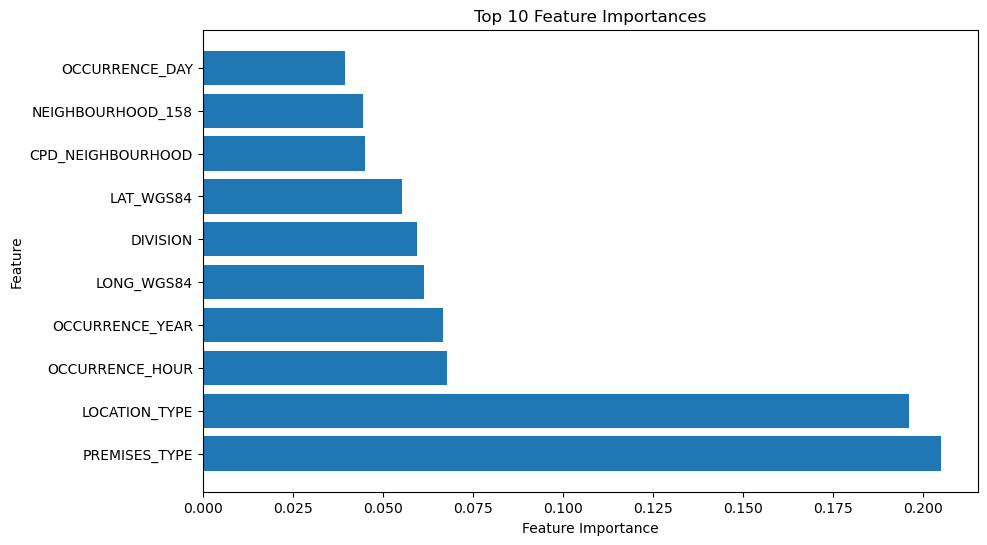

In [312]:
# Get feature importances from the trained model
feature_importances = clf_RF.feature_importances_

# Get the names of your features
feature_names = features.columns

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualizing the feature importances dataframe
print(feature_importance_df)

# Plotting the the most important features
top_n = 10  # Selecting the top ten features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.show()

## <span style="color:LightCoral">Fourth Model Implementation using </span><span style="color:SeaGreen">Random Forest..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...on Scaled Dataset with LabelEncoding and following Feature Selection (Random Forest)</span>

#### <span style="color:Teal">Feature selection based of random forest imortance above</span>

In [9]:
features = df_le_scaled[['PREMISES_TYPE', 'LOCATION_TYPE', 'OCCURRENCE_HOUR', 'LONG_WGS84', 'DIVISION', 'LAT_WGS84']]

### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

In [314]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE techni

Current shape of training set:  (232257, 6)
Current shape of training target labels:  (232257,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [315]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (611365, 6)
New shape of training label set following SMOTE:  (611365,)

New value counts by class:
 0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


#### <span style="color:Teal">Building model</span>

In [316]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

#### <span style="color:Teal">Evaluating Results</span>

In [317]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuaracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.6501566167510408
Testing Accuaracy : 0.5144214830367997


In [318]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57     52403
           1       0.49      0.64      0.56     20047
           2       0.51      0.66      0.57     15037
           3       0.26      0.53      0.35      8442
           4       0.12      0.27      0.16      3610

    accuracy                           0.51     99539
   macro avg       0.44      0.51      0.44     99539
weighted avg       0.63      0.51      0.53     99539



#### <span style="color:Teal">k-fold Cross Validation</span>

In [319]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, features, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.6348148170150762
Mean precision_macro: 0.5623552270314764
Mean recall_macro: 0.38326437443749495
Mean f1_macro: 0.3883596399206335


#### <span style="color:Teal">Confusion Matrix</span>

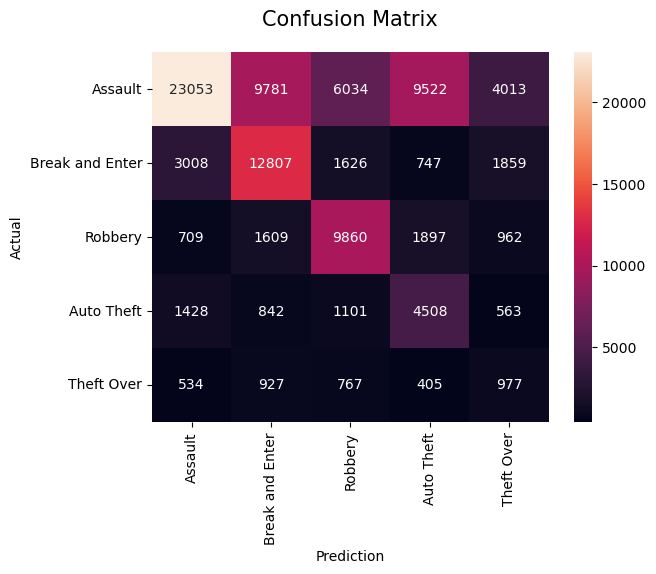

In [322]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal">Learning Curves</span>

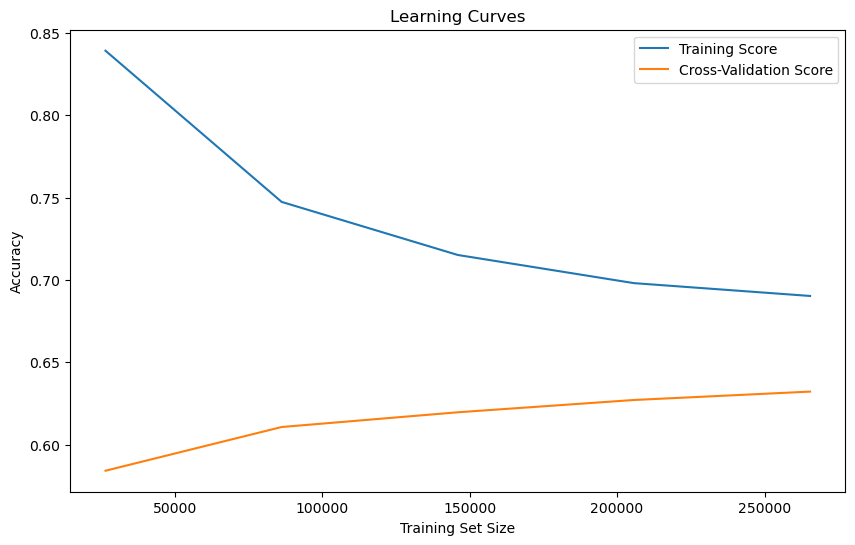

In [320]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_RF, features, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

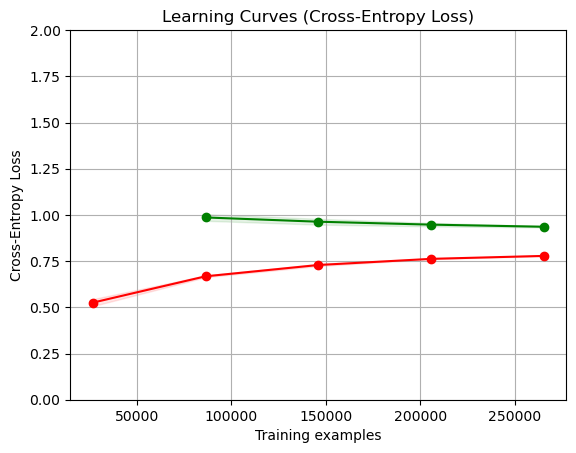

In [321]:
plot_learning_curve_loss(clf_RF, "Learning Curves (Cross-Entropy Loss)", features, y, ylim=(0, 2), cv=5)
plt.show()

## Final and Best Random Forest Model

### <span style="color:Teal">Second Split: 90% Training and 10% for Testing</span>

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.1,  random_state = 42, stratify = y) 
smt = SMOTE() # Instantiating the SMOTE function
print("Current shape of training set: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("Current shape of training target labels: ", y_train.shape)
print("\nCurrent value counts by class:\n",(pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE techni

Current shape of training set:  (298616, 6)
Current shape of training target labels:  (298616,)

Current value counts by class:
 0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [11]:
print("New shape of training set following SMOTE: ", X_train.shape) #Checking X_train and Y_train sizes before resampling
print("New shape of training label set following SMOTE: ", y_train.shape)
print("\nNew value counts by class:\n",(pd.DataFrame(y_train)).value_counts())

New shape of training set following SMOTE:  (786040, 6)
New shape of training label set following SMOTE:  (786040,)

New value counts by class:
 0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


#### <span style="color:Teal">Building Model</span>

In [12]:
#Creating a Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features = 1, random_state = 42) # New Hyperparameters

#Training the model
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

#### <span style="color:Teal">Evaluating Results</span>

In [13]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.6346839855478092
Testing Accuaracy : 0.5125678119349005


In [14]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.43      0.56     17468
           1       0.49      0.64      0.56      6682
           2       0.51      0.66      0.58      5012
           3       0.26      0.54      0.35      2814
           4       0.11      0.27      0.16      1204

    accuracy                           0.51     33180
   macro avg       0.44      0.51      0.44     33180
weighted avg       0.63      0.51      0.53     33180



#### <span style="color:Teal">Validating Results</span>

In [15]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(clf_RF, features, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.6348148170150762
Mean precision_macro: 0.5623552270314764
Mean recall_macro: 0.38326437443749495
Mean f1_macro: 0.3883596399206335


#### <span style="color:Teal">Evaluating Results: Confusion matrix</span>

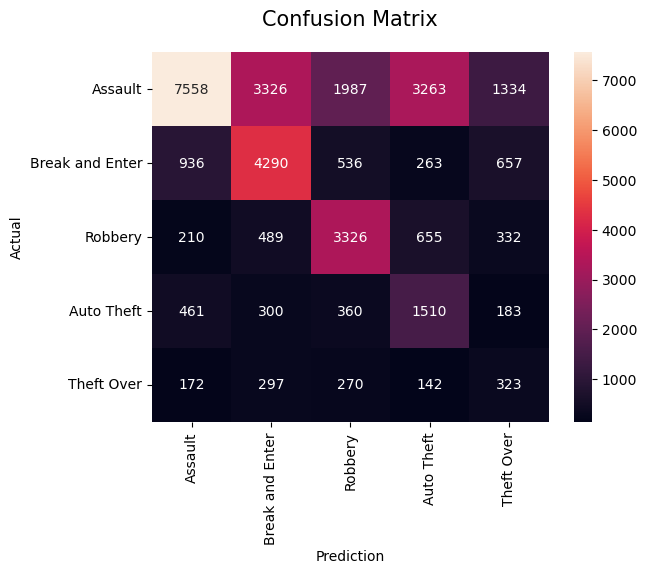

In [16]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal">Learning Curves of Accuracy and Cross Entropy Loss againts Training Data size</span>

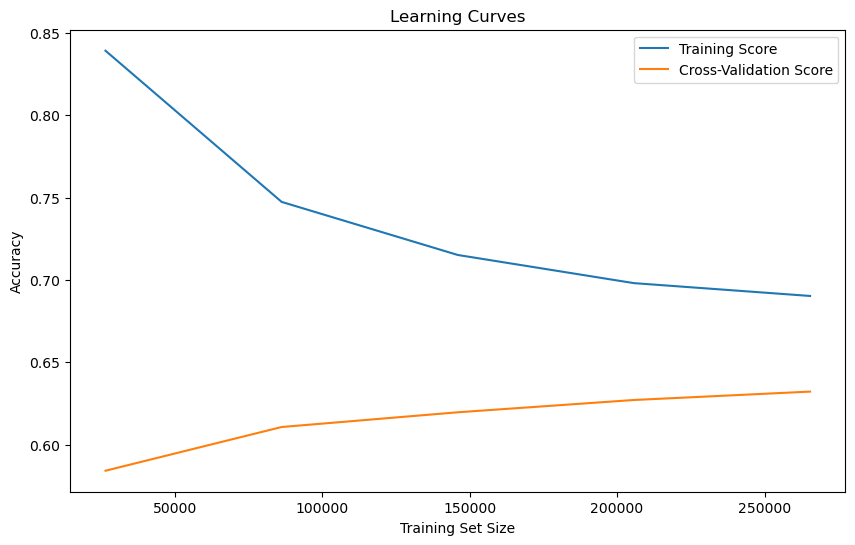

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_RF, features, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

## <span style="color:LightCoral">Fifth Model Implementation using </span><span style="color:SeaGreen">K-Nearest Neighbor Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On factorised data with no scaling or specific feature selection applied)</span>

### <span style="color:Teal">First Split: 90% for training to 10%  for testing</span>

### <span style="color:">Splitting, OverSampling and Training</span>

In [116]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.1, random_state = 1, stratify=y)
# stratify to randomly select samples

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(298616, 15)
(298616,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [117]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)

(786040, 15)
(786040,)


In [118]:
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [119]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786040, 15), (33180, 15), (786040,), (33180,))

In [120]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [121]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

### Building the KNN Model

In [124]:
# Instantiating KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 5)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

In [125]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_predict)) )

Accuracy: 0.38


In [126]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.8699888046409852
Testing Accuaracy : 0.3785111512959614


### Evaluating the results

#### <span style="color:Teal">Confusion Matrix</span>

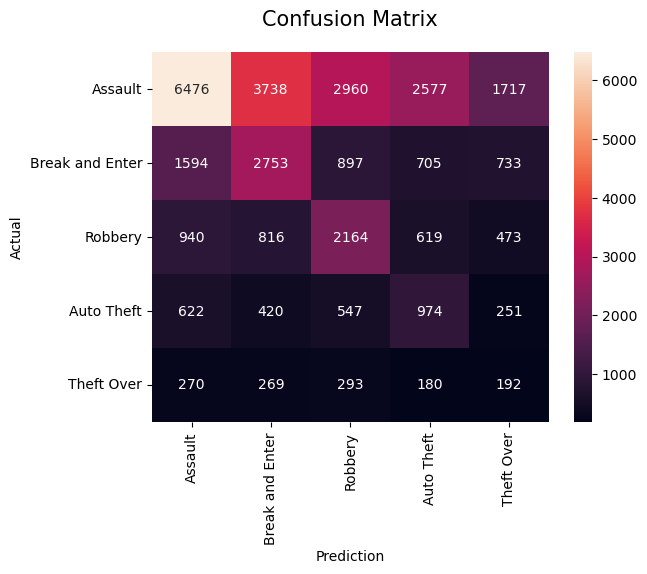

In [128]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

### Evaluating the Model

In [129]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.37      0.47     17468
           1       0.34      0.41      0.38      6682
           2       0.32      0.43      0.36      5012
           3       0.19      0.35      0.25      2814
           4       0.06      0.16      0.08      1204

    accuracy                           0.38     33180
   macro avg       0.31      0.34      0.31     33180
weighted avg       0.48      0.38      0.40     33180



### Hyperparameters
In order to decide the best value for hyperparameter k (number of neighbors), We need to train and test your model on 10 different k values and finally use the one that gives the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. We need them later to plot a graph to choose the best neighbour value.

In [130]:
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      

The following piece of code is where all the magic will happen. We enumerate over all the nine neighbor values and for each neighbor we then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [131]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array

We plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. Now we can choose the best k value at which our model performs the best.

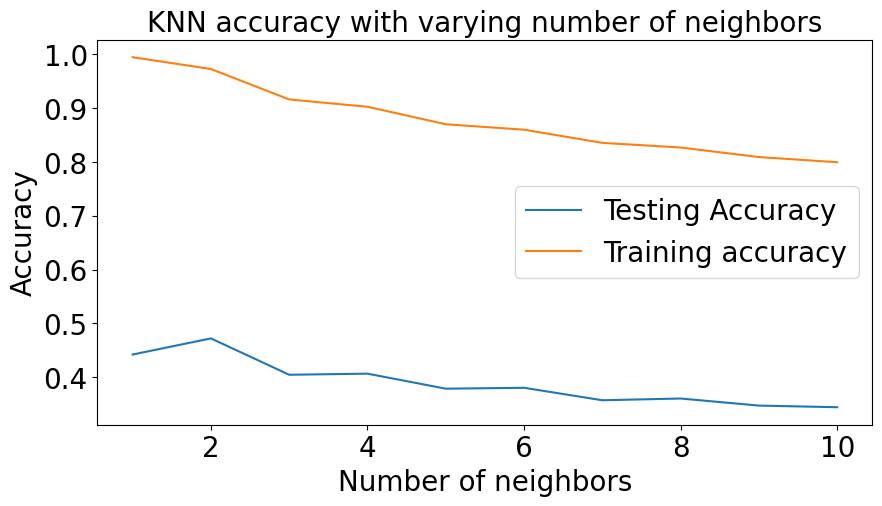

In [132]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect but fewer neighbors corresponds to a complex model that will not generalise well. But when more neigh‐bors are considered, the model becomes simpler and the training accuracy drops. The best performance is somewhere in the middle, using either four or six neighbors.

### <span style="color:Teal">Second Split: 80% for training to 20%  for testing</span>

In [134]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.2, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(265436, 15)
(265436,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [135]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(698700, 15)
(698700,)
0    139740
1    139740
2    139740
3    139740
4    139740
dtype: int64


In [136]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698700, 15), (66360, 15), (698700,), (66360,))

In [137]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [138]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building the KNN Model

In [139]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 2) # 2 neighbors are selected to try and improve accuracy. (lower neighbors will lead to a more complex model that does not generalise well.)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

In [140]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.9734721625876628
Testing Accuaracy : 0.46422543701024716


### Evaluating the results

#### <span style="color:Teal">Confusion Matrix</span>

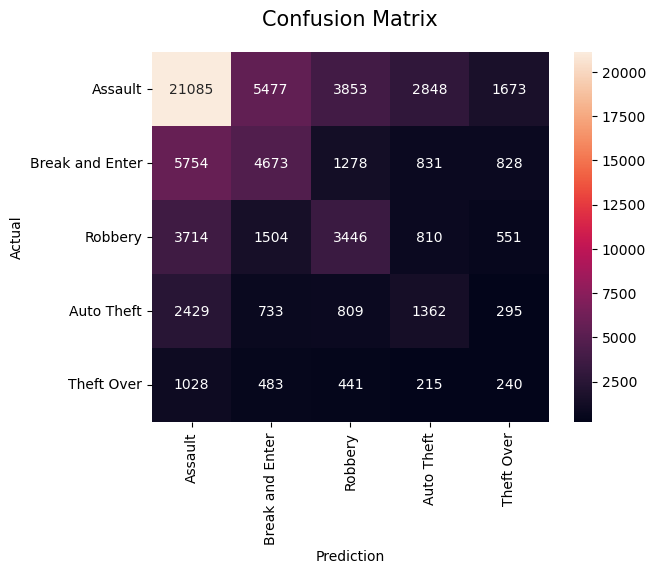

In [141]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [142]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     34936
           1       0.36      0.35      0.36     13364
           2       0.35      0.34      0.35     10025
           3       0.22      0.24      0.23      5628
           4       0.07      0.10      0.08      2407

    accuracy                           0.46     66360
   macro avg       0.33      0.33      0.33     66360
weighted avg       0.47      0.46      0.47     66360



### <span style="color:Teal">Third Split: 70% for training to 30%  for testing</span>

In [143]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(df_fact_X, y, test_size = 0.3, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(232257, 15)
(232257,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [144]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(611365, 15)
(611365,)
0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


In [145]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((611365, 15), (99539, 15), (611365,), (99539,))

In [146]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [147]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building the KNN Model

In [156]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 2)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

In [157]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.9744358934515388
Testing Accuaracy : 0.45762967279156913


### Evaluating the results

#### <span style="color:Teal">Confusion Matrix</span>

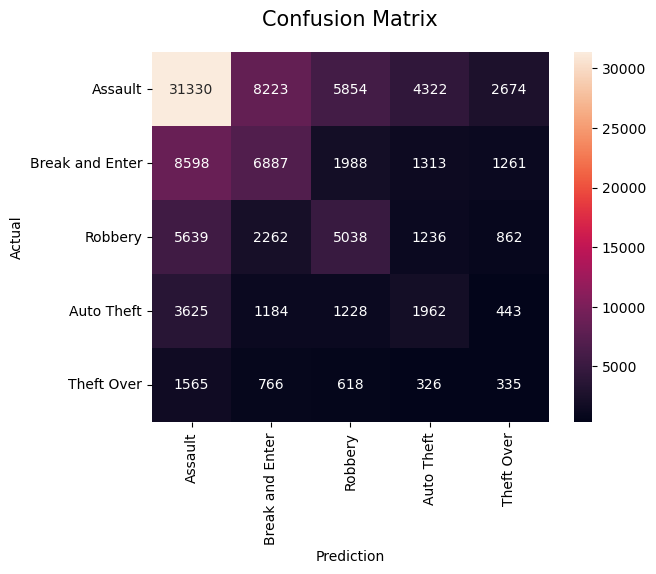

In [158]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [159]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     52403
           1       0.36      0.34      0.35     20047
           2       0.34      0.34      0.34     15037
           3       0.21      0.23      0.22      8442
           4       0.06      0.09      0.07      3610

    accuracy                           0.46     99539
   macro avg       0.32      0.32      0.32     99539
weighted avg       0.47      0.46      0.46     99539



## <span style="color:LightCoral">Sixth Model Implementation using </span><span style="color:SeaGreen">K-Nearest Neighbor Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On factorised dataset with no scaling but following feature selection (Randon Forest)</span>

### <span style="color:Teal">First Split: 70% for training to 30%  for testing</span>

In [169]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fact_RF_fs, y, test_size = 0.3, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(232257, 10)
(232257,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [170]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(611365, 10)
(611365,)
0    122273
1    122273
2    122273
3    122273
4    122273
dtype: int64


In [171]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((611365, 10), (99539, 10), (611365,), (99539,))

In [172]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [173]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building the KNN Model

In [174]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 2)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

### Evaluating the results

In [175]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.9594399417696466
Testing Accuaracy : 0.4638985724188509


#### <span style="color:Teal">Confusion Matrix</span>

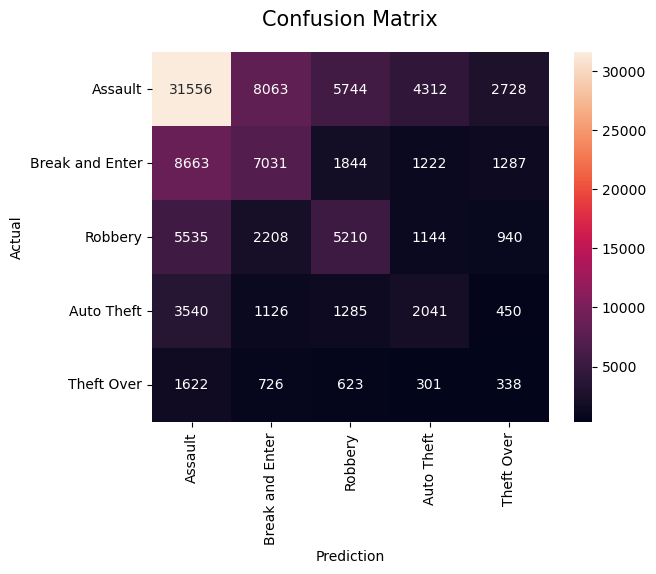

In [176]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [177]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     52403
           1       0.37      0.35      0.36     20047
           2       0.35      0.35      0.35     15037
           3       0.23      0.24      0.23      8442
           4       0.06      0.09      0.07      3610

    accuracy                           0.46     99539
   macro avg       0.33      0.33      0.33     99539
weighted avg       0.48      0.46      0.47     99539



#### <span style="color:Teal"> Cross Validation</span>

In [178]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kNN, X_fact_RF_fs, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.4926822362038954
Mean precision_macro: 0.2930004699834614
Mean recall_macro: 0.25635391798797713
Mean f1_macro: 0.2532586601424929


### Hyperparameter Tuning

In [180]:
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     

In [181]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)  

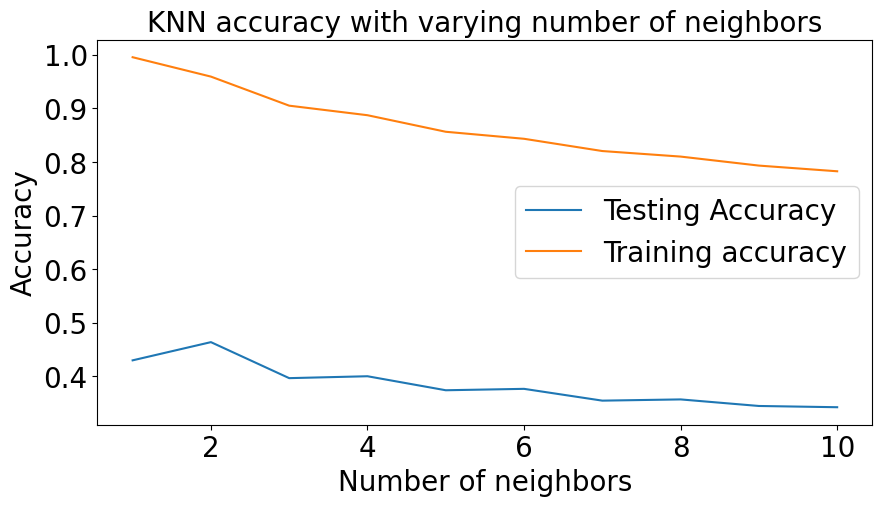

In [182]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### <span style="color:Teal">Second Split: 90% for training to 10%  for testing</span>

In [208]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fact_RF_fs, y, test_size = 0.1, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(298616, 10)
(298616,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [209]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(786040, 10)
(786040,)
0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [210]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786040, 10), (33180, 10), (786040,), (33180,))

In [211]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [212]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building the KNN Model

In [213]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 4)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

### Evaluating the results

In [214]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.8878072362729632
Testing Accuaracy : 0.415581675708258


#### <span style="color:Teal">Confusion Matrix</span>

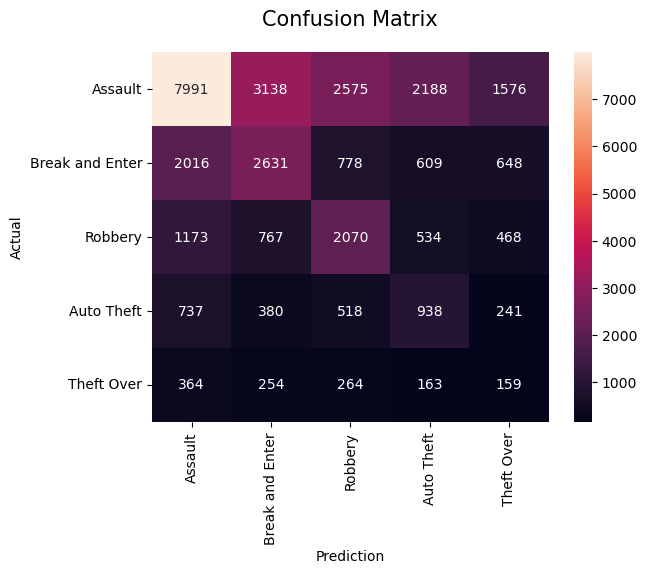

In [215]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [216]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54     17468
           1       0.37      0.39      0.38      6682
           2       0.33      0.41      0.37      5012
           3       0.21      0.33      0.26      2814
           4       0.05      0.13      0.07      1204

    accuracy                           0.42     33180
   macro avg       0.32      0.35      0.32     33180
weighted avg       0.49      0.42      0.44     33180



#### <span style="color:Teal"> Cross Validation</span>

In [217]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kNN, X_fact_RF_fs, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.4940023039948015
Mean precision_macro: 0.30127967547209034
Mean recall_macro: 0.26606148917875166
Mean f1_macro: 0.2666802835719195


# <span style="color:LightCoral">Seventh Model Implementation using </span><span style="color:SeaGreen">K-Nearest Neighbor Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On scaled and label encoded dataset following feature selection (Pearsons Correlation)</span>

### <span style="color:Teal">Second Split: 90% for training to 10%  for testing</span>

### <span style="color:">Splitting, OverSampling and Training</span>

In [219]:
# Loading in new dataset)Label encoded and scaled with feature selection
X_le_fsCor_scaled = pd.read_csv('X_le_fsCor_scaled.csv')

In [220]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_le_fsCor_scaled, y, test_size = 0.1, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(298616, 5)
(298616,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [221]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(786040, 5)
(786040,)
0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [222]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786040, 5), (33180, 5), (786040,), (33180,))

In [223]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [224]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building the KNN Model

In [225]:
# Instantiating a KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 4)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

### Evaluating the results

In [226]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.6833596254643529
Testing Accuaracy : 0.5816455696202532


#### <span style="color:Teal">Confusion Matrix</span>

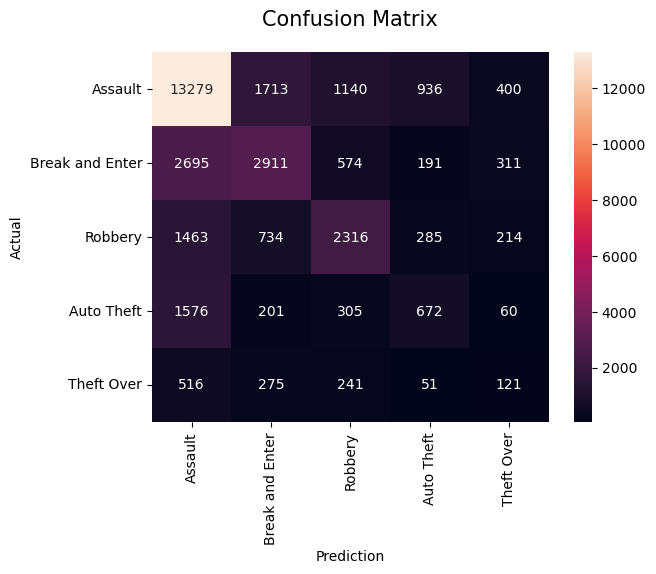

In [227]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [228]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     17468
           1       0.50      0.44      0.47      6682
           2       0.51      0.46      0.48      5012
           3       0.31      0.24      0.27      2814
           4       0.11      0.10      0.10      1204

    accuracy                           0.58     33180
   macro avg       0.42      0.40      0.41     33180
weighted avg       0.57      0.58      0.57     33180



#### <span style="color:Teal"> Cross Validation</span>

In [229]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kNN, X_le_fsCor_scaled, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.5809171935319117
Mean precision_macro: 0.423546817783523
Mean recall_macro: 0.3642924118915815
Mean f1_macro: 0.3776376027214828


### Hyperparameter Tuning

In [230]:
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

In [231]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)  

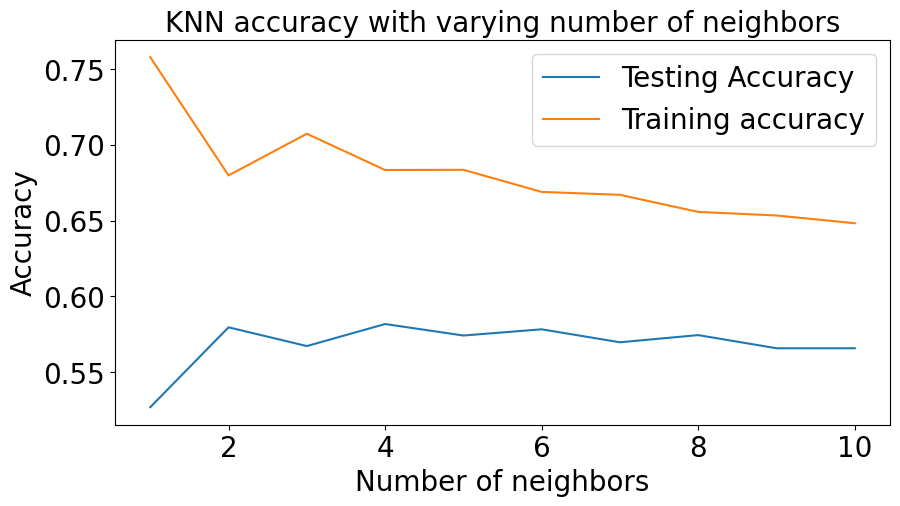

In [232]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### <span style="color:Teal">Second Split: 90% for training to 10%  for testing</span>

### <span style="color:">Splitting, OverSampling and Training</span>

In [250]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_le_fsCor_scaled, y, test_size = 0.1, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(298616, 5)
(298616,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [251]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(786040, 5)
(786040,)
0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [252]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786040, 5), (33180, 5), (786040,), (33180,))

In [253]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [254]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building kNN Model

In [255]:
# Instantiating a KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 8)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

### Evaluating the Results

In [256]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.6535977812833953
Testing Accuaracy : 0.5730259192284509


#### <span style="color:Teal">Confusion Matrix</span>

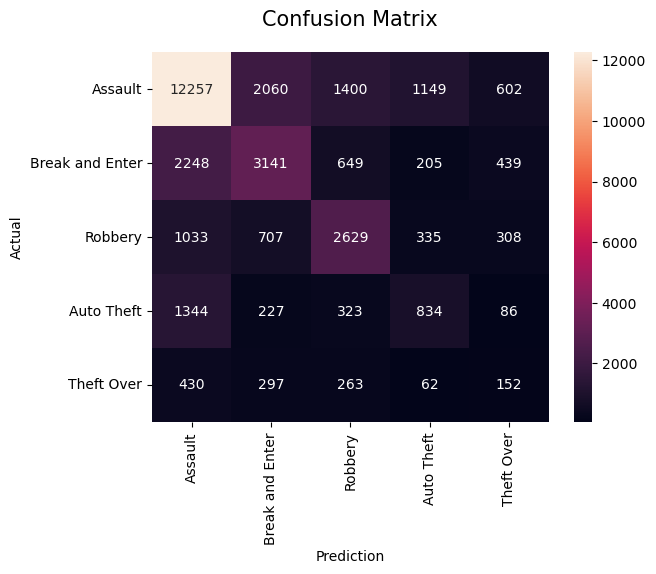

In [257]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [258]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     17468
           1       0.49      0.47      0.48      6682
           2       0.50      0.52      0.51      5012
           3       0.32      0.30      0.31      2814
           4       0.10      0.13      0.11      1204

    accuracy                           0.57     33180
   macro avg       0.42      0.42      0.42     33180
weighted avg       0.58      0.57      0.57     33180



#### <span style="color:Teal"> Cross Validation</span>

In [259]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kNN, X_le_fsCor_scaled, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: 0.5954472040992834
Mean precision_macro: 0.4491016141161722
Mean recall_macro: 0.37141785488973095
Mean f1_macro: 0.3828003618868151


# <span style="color:LightCoral">Eighth Model Implementation using </span><span style="color:SeaGreen">K-Nearest Neighbor Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On scaled and one-hot label encoded dataset following feature selection (PCA)</span>

### <span style="color:Teal">Second Split: 90% for training to 10%  for testing</span>

#### <span style="color:">Splitting, OverSampling and Training</span>

In [261]:
X_dum_fsPCA_scaled = pd.read_csv('X_dum_fsPCA_scaled.csv')

In [262]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dum_fsPCA_scaled, y, test_size = 0.1, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

(298616, 20)
(298616,)
0    174676
1     66822
2     50123
3     28141
4     12034
dtype: int64


In [263]:
# Checking the new dimensions
print(X_train.shape)
print(y_train.shape)
# Confirming a balanced dataset of target variables
print((pd.DataFrame(y_train)).value_counts())

(786040, 20)
(786040,)
0    157208
1    157208
2    157208
3    157208
4    157208
dtype: int64


In [264]:
# Printing the shape of training and testing data along with its labels.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786040, 20), (33180, 20), (786040,), (33180,))

In [265]:
# Checking the datatypes
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [266]:
# Converting to arrays for ML
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Checking the datatypes
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building kNN Model

In [267]:
# Instantiating a KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 8)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_predict = kNN.predict(X_test)

### Evaluating the Results

In [272]:
print("Training Accuracy :", kNN.score(X_train, y_train))
print("Testing Accuaracy :", kNN.score(X_test, y_test))

Training Accuracy : 0.8356508574627245
Testing Accuaracy : 0.4233574442435202


#### <span style="color:Teal">Confusion Matrix</span>

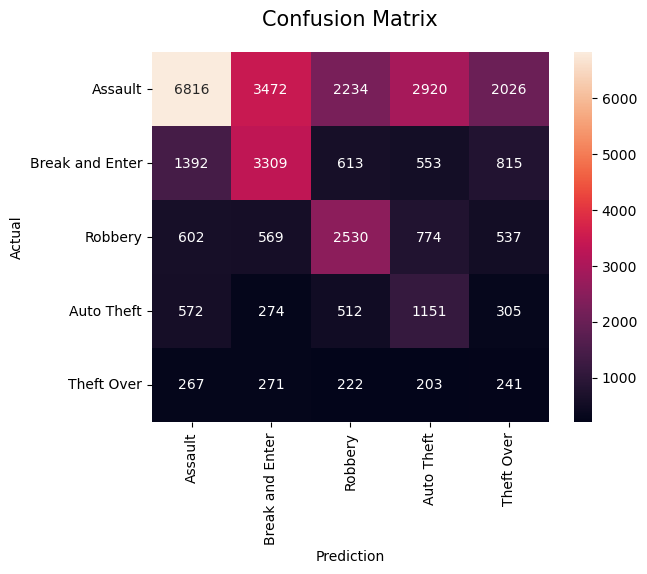

In [273]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
plt.title('Confusion Matrix', y=1.05, size=15)
ax = sns.heatmap(cm, fmt='d', annot = True,                  
                 xticklabels=target_names,                
                 yticklabels=target_names,)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#### <span style="color:Teal"> Classification Report</span>

In [274]:
# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.39      0.50     17468
           1       0.42      0.50      0.45      6682
           2       0.41      0.50      0.45      5012
           3       0.21      0.41      0.27      2814
           4       0.06      0.20      0.09      1204

    accuracy                           0.42     33180
   macro avg       0.36      0.40      0.36     33180
weighted avg       0.54      0.42      0.45     33180



#### <span style="color:Teal"> Cross Validation</span>

In [275]:
# Specifying the required metrics for evaluation (e.g., accuracy, precision, recall, f1)
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kNN, X_dum_fsPCA_scaled, y, scoring=scoring_metrics, cv=10) # on 10 different data folds

# Extract and print the mean scores for each metric
for metric in scoring_metrics:
    mean_score = cv_results['test_' + metric].mean()
    print(f'Mean {metric}: {mean_score}')

Mean accuracy: nan
Mean precision_macro: nan
Mean recall_macro: nan
Mean f1_macro: nan


### Hyperparameter Tuning

In [276]:
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

In [277]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)  

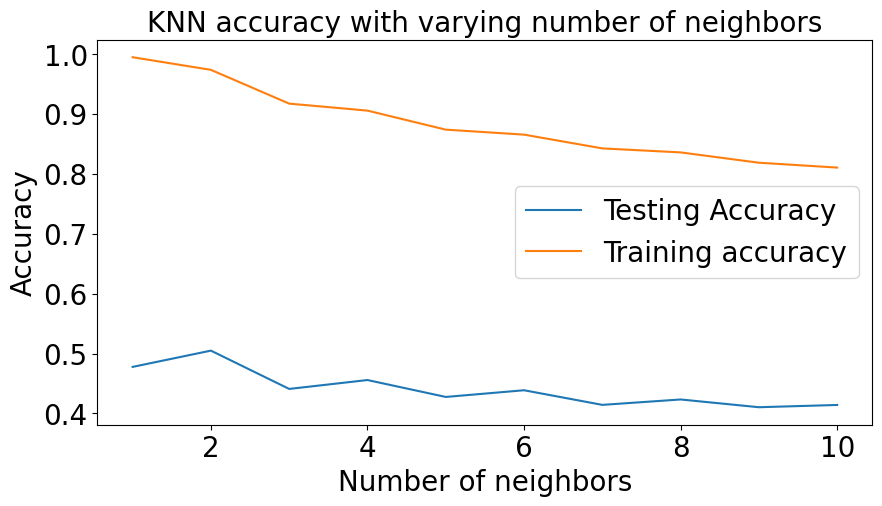

In [278]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## <span style="color:LightCoral">Ninth Model Implementation using </span><span style="color:SeaGreen">Naive Bayes Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On scaled label encoded data and following feature selection(Pearsons Correlation)</span>

Train-Test Split: 10.0%
Classifier: Naive Bayes
Cross-Validation Scores: [0.46364945 0.46449442 0.45757916 0.46598463 0.46583393]
Mean Accuracy: 0.463508317902804
Standard Deviation: 0.003088295980901449

Test Accuracy on 10.0% Test Set: 0.45798673899939724
-------------------------------


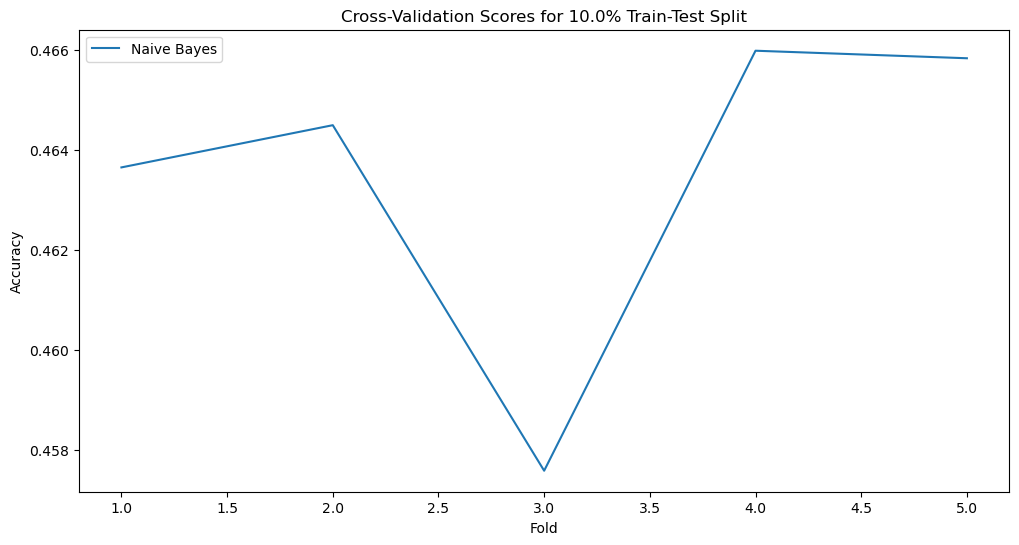

Train-Test Split: 20.0%
Classifier: Naive Bayes
Cross-Validation Scores: [0.46146022 0.46271215 0.46041404 0.46885301 0.46531166]
Mean Accuracy: 0.46375021583356757
Standard Deviation: 0.0030307893011428206

Test Accuracy on 20.0% Test Set: 0.46256781193490054
-------------------------------


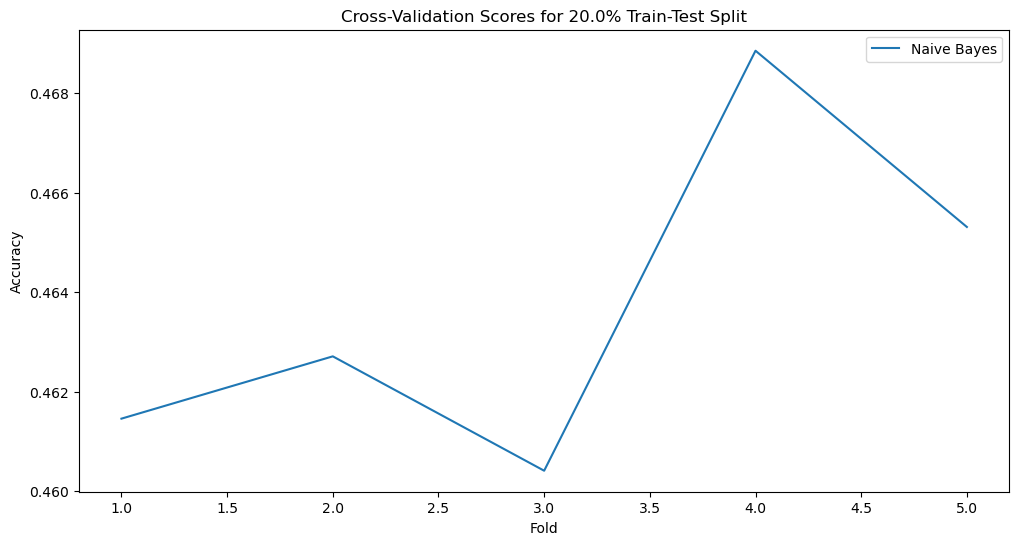

Train-Test Split: 30.0%
Classifier: Naive Bayes
Cross-Validation Scores: [0.46260656 0.45948506 0.46218596 0.46898883 0.46440335]
Mean Accuracy: 0.46353395151182336
Standard Deviation: 0.0031490372401155537

Test Accuracy on 30.0% Test Set: 0.46213042124192527
-------------------------------


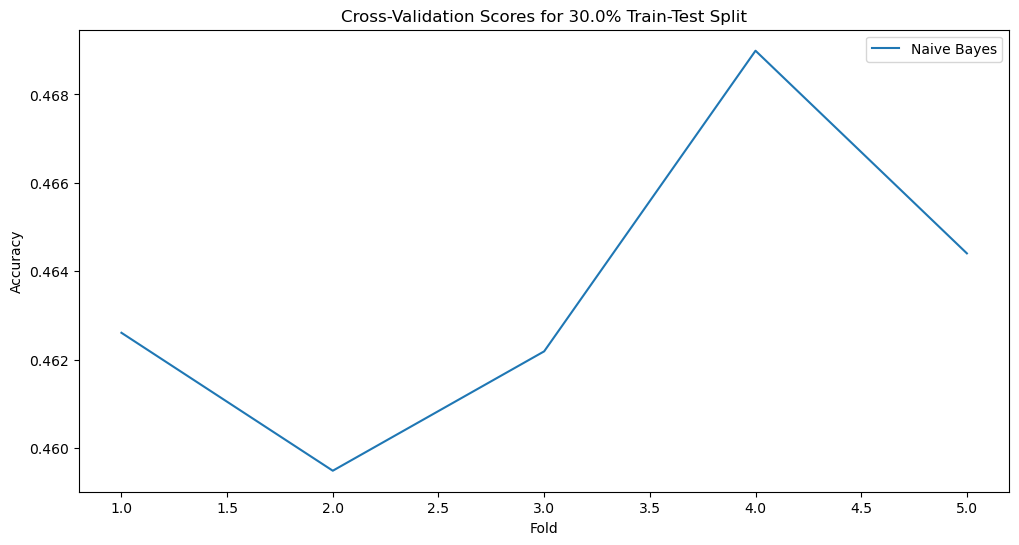

In [330]:
X_le_fsCor_scaled = pd.read_csv('X_le_fsCor_scaled.csv')



# Different train-test splits
splits = [0.1, 0.2, 0.3]

# Classifier
classifiers = {
    "Naive Bayes": GaussianNB(),
}

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_le_fsCor_scaled, y, test_size=split, random_state=42)

    # Visualization setup
    plt.figure(figsize=(12, 6))
    ax = plt.subplot()

    for clf_name, clf in classifiers.items():
        # Perform cross-validation on the training set
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  

        # Plot the cross-validation scores
        sns.lineplot(x=np.arange(1, 6), y=cv_scores, label=clf_name, ax=ax)

        # Print results for each split
        print(f"Train-Test Split: {split * 100}%")
        print(f"Classifier: {clf_name}")
        print("Cross-Validation Scores:", cv_scores)
        print("Mean Accuracy:", cv_scores.mean())
        print("Standard Deviation:", cv_scores.std())
        print("")

        # Train the model on the full training set and evaluate on the test set
        clf.fit(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        print(f"Test Accuracy on {split * 100}% Test Set:", test_accuracy)
        print("-------------------------------")

    # Visuals settings
    plt.title(f"Cross-Validation Scores for {split * 100}% Train-Test Split")
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## <span style="color:LightCoral">Tenth Model Implementation using </span><span style="color:SeaGreen">Support Vector Machine (SVM) Algorithm..</span><span style="color:LightCoral">...for classification</span><span style="color:SeaGreen">...On scaled label encoded data and following feature selection(PCA)</span>

In [ ]:
X_le_fsPCA_scaled = pd.read_csv('X_le_fsPCA_scaled.csv')
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_le_fsPCA_scaled, y, test_size = 0.3, random_state = 1, stratify=y)

smt = SMOTE() # Instantiating the SMOTE function
print(X_train.shape) #Checking X_train and Y_train sizes before resampling
print(y_train.shape)
print((pd.DataFrame(y)).value_counts()) #Checking the value counts / imbalance between values before SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train) #Applying SMOTE technique

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':["linear", "rbf", "Gaussian"]}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
# Retrieve the best hyperparameters found by the grid search
grid.best_params_
# Retrieve the best model based on the best hyperparameters
grid.best_estimator_
# Use the best model to make predictions on the test set
grid_predictions = grid.predict(X_test)
# Retrieve the best score
grid.best_score_
# Print the best scores
print("Best score: {:.2f}".format(grid.best_score_))
#Print the best parameters
print("Best parameters: {}".format(grid.best_params_))
# Compute the confusion matrix
cmG = confusion_matrix(y_test,grid_predictions)
# Plot the confusion matrix as a heatmap
sns.heatmap(cmG, fmt='d', annot=True)
# Print the classification report, including precision, recall, and F1-score
print(classification_report(y_test,grid_predictions))


## References

Iqbal, Dr.M. (n.d.). CCT College Dublin: Log in to the site. [online] moodle.cct.ie. Available at: https://moodle.cct.ie/course/view.php?id=2625 [Accessed 17 Nov. 2023].
            
MüllerA.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Sebastopol, CA: O’Reilly Media, Inc.

seaborn.pydata.org. (n.d.). User guide and tutorial — seaborn 0.13.0 documentation. [online] Available at: https://seaborn.pydata.org/tutorial.

matplotlib.org. (n.d.). Plot types — Matplotlib 3.5.2 documentation. [online] Available at: https://matplotlib.org/stable/plot_types/index.html.
        
Scikit-Learn (2019). sklearn.preprocessing.StandardScaler — scikit-learn 0.21.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.
        
Hvilshøj, F. (2022). Balanced and Imbalanced Datasets in Machine Learning [Introduction]. [online] encord.com. Available at: https://encord.com/blog/an-introduction-to-balanced-and-imbalanced-datasets-in-machine-learning/.        